## Predicting whether a student will Pass or Fail his High school using KNearest Neighbors

In [39]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df=pd.read_csv("student-mat.csv",sep=";")
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

### Now, Let's perform binning of the target column G3 having range of values from (0-20) to categorise whether the student has failed(<=7) or passed

In [41]:
df["G3_Binned"]=pd.cut(df['G3'],[-1,7,20],labels=['F','P'])
df.head(10)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... freetime goout  Dalc  Walc  health absences  G1  G2  G3 G3_Binned  
0  ...        3     4     1     1       3        6   5   6   6         F  
1  ...        3     3     1     1       3        4   5   5   6         F  
2  ...        3     2     2     3       3       10   7   8  10         P  
3  ...        2     2     1     1       5        2  15  14  15         P  
4  ...        3     2     1     2       5        4   6  10  10         P  
5  ...        4     2     1     2       5       10  15  15  15         P  
6  ...        4     4     1     1       3        0  12  12  11         P  
7  ...        1     4     1     1       1        6   6   5   6         F  
8  ...        2     2     1     1       1        0  16  18  19         P  
9  ...        5     1     1     1       5        0  14  15  15         P  

[10 rows x 34 columns]

### From this we can see that a new column G3_Binned has been added. This newly added columns consists the corresponding grades of the student Next, let's subset the dataframe into the features that we are gonna use for the classification .

In [42]:
df_new=df[['school','sex','reason','Pstatus','studytime','failures','famsup','paid','higher','internet','romantic','Dalc','health','absences','G1','G2','G3','G3_Binned',]]
df_new.head()           

school sex  reason Pstatus  studytime  failures famsup paid higher internet  \
0     GP   F  course       A          2         0     no   no    yes       no   
1     GP   F  course       T          2         0    yes   no    yes      yes   
2     GP   F   other       T          2         3     no  yes    yes      yes   
3     GP   F    home       T          3         0    yes  yes    yes      yes   
4     GP   F    home       T          2         0    yes  yes    yes       no   

  romantic  Dalc  health  absences  G1  G2  G3 G3_Binned  
0       no     1       3         6   5   6   6         F  
1       no     1       3         4   5   5   6         F  
2       no     2       3        10   7   8  10         P  
3      yes     1       5         2  15  14  15         P  
4       no     1       5         4   6  10  10         P

In [43]:
df_new.isnull().sum(axis = 0)



school       0
sex          0
reason       0
Pstatus      0
studytime    0
failures     0
famsup       0
paid         0
higher       0
internet     0
romantic     0
Dalc         0
health       0
absences     0
G1           0
G2           0
G3           0
G3_Binned    0
dtype: int64

### From this, we can see that the  null values are dealt with completely. So we can move forward with our wrangling .

In [44]:
#Now, let's convert the categorical values into numenrcial so that they can be fed into the model
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [45]:
df_new['sex'] = le.fit_transform(df_new['sex'])
df_new['reason'] = le.fit_transform(df_new['reason'])
df_new['Pstatus'] = le.fit_transform(df_new['Pstatus'])
df_new['famsup'] = le.fit_transform(df_new['famsup'])
df_new['paid'] = le.fit_transform(df_new['paid'])
df_new['higher'] = le.fit_transform(df_new['higher'])
df_new['internet'] = le.fit_transform(df_new['internet'])
df_new['romantic'] = le.fit_transform(df_new['romantic'])
df_new['G3_Binned'] = le.fit_transform(df_new['G3_Binned'])

df_new.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

school  sex  reason  Pstatus  studytime  failures  famsup  paid  higher  \
0     GP    0       0        0          2         0       0     0       1   
1     GP    0       0        1          2         0       1     0       1   
2     GP    0       2        1          2         3       0     1       1   
3     GP    0       1        1          3         0       1     1       1   
4     GP    0       1        1          2         0       1     1       1   

   internet  romantic  Dalc  health  absences  G1  G2  G3  G3_Binned  
0         0         0     1       3         6   5   6   6          0  
1         1         0     1       3         4   5   5   6          0  
2         1         0     2       3        10   7   8  10          1  
3         1         1     1       5         2  15  14  15          1  
4         0         0     1       5         4   6  10  10          1

In [46]:
st=preprocessing.StandardScaler()
df_new['studytime']=st.fit_transform(df_new[['studytime']])
df_new['absences']=st.fit_transform(df_new[['absences']])
df_new['G1']=st.fit_transform(df_new[['G1']])
df_new['G2']=st.fit_transform(df_new[['G2']])

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all co

In [47]:
df_new.columns

Index(['school', 'sex', 'reason', 'Pstatus', 'studytime', 'failures', 'famsup',
       'paid', 'higher', 'internet', 'romantic', 'Dalc', 'health', 'absences',
       'G1', 'G2', 'G3', 'G3_Binned'],
      dtype='object')

In [48]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  freetime goout  Dalc  Walc  health absences  G1  G2  G3 G3_Binned  
0        3     4     1     1       3        6   5   6   6         F  
1        3     3     1     1       3        4   5   5   6         F  
2        3     2     2     3       3       10   7   8  10         P  
3        2     2     1     1       5        2  15  14  15         P  
4        3     2     1     2       5        4   6  10  10         P  

[5 rows x 34 columns]

### For better understanding the encoded values, Fail-0 Pass-1

In [49]:
print(df_new['G3_Binned'].value_counts(),df['G3_Binned'].value_counts())

1    325
0     70
Name: G3_Binned, dtype: int64 P    325
F     70
Name: G3_Binned, dtype: int64


In [88]:
#KNN can tend to perform poorly with categorical features so first let's try predicting the pass or fail using the previous year grades
X=df_new[['G1','G2']]
y=df_new['G3_Binned']

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [90]:
#Validation split (Done to find the best K)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=3)

### Now the data is ready for modelling

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn

In [92]:
#Training the model for multiple values of K and testing it on the validation set(Model with highest accuracy chosen)
#Keeping all the values of K to be odd(Binary classification)
score=[]
for i in range(1,20,2):
    knn=KNeighborsClassifier(i,n_jobs=-1)
    knn.fit(X_train,y_train)
    ypred=knn.predict(X_val)
    score.append(metrics.accuracy_score(y_val,ypred))

[0.875, 0.875, 0.90625, 0.9375, 0.9375, 0.90625, 0.90625, 0.90625, 0.9375, 0.90625]


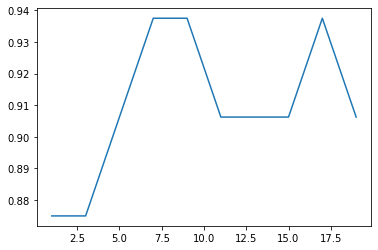

In [93]:
sn.lineplot(x=range(1,20,2),y=score)
print(score)
#Max accuracy on validation with k=7,9 and 17
#Let's go with the least value of k=7

### Now we have the value for K decided. Next would be to get into parameter tuning

In [94]:
knn_par=KNeighborsClassifier(7,n_jobs=-1,algorithm="auto",p=2)
knn_par.fit(X_train,y_train)
ypred=knn_par.predict(X_val)
print("Accuracy on validation set:",100*metrics.accuracy_score(y_val,ypred))

Accuracy on validation set: 93.75


### However Parameter tuning does'nt seem to be increasing the accuracy, therefore let's move onto testing our model

In [96]:
knn_final=KNeighborsClassifier(7,n_jobs=-1,algorithm="auto",p=2)
knn_final.fit(X_train,y_train)
ypred=knn_final.predict(X_test)
print("Accuracy on test set:",100*metrics.accuracy_score(y_test,ypred))

Accuracy on test set: 94.9367088607595


### The accuracy recorded on the test set is 95% . Thereofore, we can say that our model performs pretty well